In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
import string
import copy
from collections import Counter
import re
import os
import nlp
import spacy
nlp = spacy.load("en_core_web_sm")
import nltk
from nltk import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from nltk import ngrams 
from gensim.models.phrases import Phrases, Phraser

In [2]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kashaf Jamil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df = pd.read_csv("C://code/factcheckhub.csv")
df

,content,date,label,title,url
0,"He made the claim, , while questioning how Ti...","June 10, 2023",True,Did Tinubu win only two out of 23 LGAs in Kadu...,https://factcheckhub.com/did-tinubu-win-only-t...
1,A video has been circulating on social media w...,"June 11, 2023",False,Old video of Nigerian border re-opening resurf...,https://factcheckhub.com/old-video-of-nigerian...
2,"According to the report, as fewer people turn ...","June 26, 2023",False,More Nigerian media outlets are embracing digi...,https://factcheckhub.com/more-nigerian-media-o...
3,NaN,"June 11, 2023",False,Soludo makes false claim about Milton steel co...,https://factcheckhub.com/soludo-makes-false-cl...
4,NaN,"June 26, 2023",False,Doctored images of Peter Obi at Paris summit c...,https://factcheckhub.com/doctored-images-of-pe...
...,...,...,...,...,...
735,NaN,"March 17, 2023",False,Lagos guber poll: False claim circulates that ...,https://factcheckhub.com/lagos-guber-poll-fals...
736,NaN,"November 1, 2021",False,Anambra Election: Checking Soludo’s claim on w...,https://factcheckhub.com/fact-checking-soludos...
737,The tweets reads: “ The guy that had a 53.7% ...,"April 25, 2023",True,Did Anambra record 53.7% poverty rate under Pe...,https://factcheckhub.com/did-anambra-record-53...
738,The study which was in July stated that AI-g...,"August 7, 2023",False,How Tiktok promotes misinformation about brand...,https://factcheckhub.com/how-tiktok-promotes-m...


##### Let's review the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  272 non-null    object
 1   date     740 non-null    object
 2   label    740 non-null    bool  
 3   title    740 non-null    object
 4   url      740 non-null    object
dtypes: bool(1), object(4)
memory usage: 24.0+ KB


In [5]:
df.columns

Index(['content', 'date', 'label', 'title', 'url'], dtype='object')

In [6]:
df.describe()

,content,date,label,title,url
count,272,740,740,740,740
unique,171,549,2,739,740
top,.,"July 16, 2022",False,"Ezekwesili, other panellists at ICIR, ICFJ web...",https://factcheckhub.com/did-tinubu-win-only-t...
freq,95,6,735,2,1


In [7]:
df.rename(columns = {"date":"publication_date"}, inplace = True)
y = df.label
print("Ratio of Real and Fake news")
y.value_counts(normalize = True).rename({"True": "Real", "False": "Fake"})

Ratio of Real and Fake news


False    0.993243
True     0.006757
Name: label, dtype: float64

In [8]:
 #Calculating the number of missing values
    
df.isnull().sum()

content             468
publication_date      0
label                 0
title                 0
url                   0
dtype: int64

In [9]:
# Unique values in the dataframe
df.nunique()

content             171
publication_date    549
label                 2
title               739
url                 740
dtype: int64

In [10]:
df.fillna("missing content", inplace = True)

In [11]:
df.isnull().sum()
#handle the missing values

content             0
publication_date    0
label               0
title               0
url                 0
dtype: int64

In [12]:
df["title_content"] = df["title"] + df["content"]

In [13]:
df["title"] = df["title"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["content"] = df["content"].apply(lambda x: " ".join(x.lower() for x in x.split()))



In [14]:
df["title_content_lower"] = df["title"] + df["content"]
df.head(4)

,content,publication_date,label,title,url,title_content,title_content_lower
0,"he made the claim, , while questioning how tin...","June 10, 2023",True,did tinubu win only two out of 23 lgas in kadu...,https://factcheckhub.com/did-tinubu-win-only-t...,Did Tinubu win only two out of 23 LGAs in Kadu...,did tinubu win only two out of 23 lgas in kadu...
1,a video has been circulating on social media w...,"June 11, 2023",False,old video of nigerian border re-opening resurf...,https://factcheckhub.com/old-video-of-nigerian...,Old video of Nigerian border re-opening resurf...,old video of nigerian border re-opening resurf...
2,"according to the report, as fewer people turn ...","June 26, 2023",False,more nigerian media outlets are embracing digi...,https://factcheckhub.com/more-nigerian-media-o...,More Nigerian media outlets are embracing digi...,more nigerian media outlets are embracing digi...
3,missing content,"June 11, 2023",False,soludo makes false claim about milton steel co...,https://factcheckhub.com/soludo-makes-false-cl...,Soludo makes false claim about Milton steel co...,soludo makes false claim about milton steel co...


In [15]:
df["title_content_length"] = df["title_content"].apply(lambda x: len(x) - x.count(" "))
df["content_length"] = df["content"].apply(lambda x: len(x) - x.count(" "))
df.head(5)

,content,publication_date,label,title,url,title_content,title_content_lower,title_content_length,content_length
0,"he made the claim, , while questioning how tin...","June 10, 2023",True,did tinubu win only two out of 23 lgas in kadu...,https://factcheckhub.com/did-tinubu-win-only-t...,Did Tinubu win only two out of 23 LGAs in Kadu...,did tinubu win only two out of 23 lgas in kadu...,1505,1459
1,a video has been circulating on social media w...,"June 11, 2023",False,old video of nigerian border re-opening resurf...,https://factcheckhub.com/old-video-of-nigerian...,Old video of Nigerian border re-opening resurf...,old video of nigerian border re-opening resurf...,170,120
2,"according to the report, as fewer people turn ...","June 26, 2023",False,more nigerian media outlets are embracing digi...,https://factcheckhub.com/more-nigerian-media-o...,More Nigerian media outlets are embracing digi...,more nigerian media outlets are embracing digi...,3197,3131
3,missing content,"June 11, 2023",False,soludo makes false claim about milton steel co...,https://factcheckhub.com/soludo-makes-false-cl...,Soludo makes false claim about Milton steel co...,soludo makes false claim about milton steel co...,90,14
4,missing content,"June 26, 2023",False,doctored images of peter obi at paris summit c...,https://factcheckhub.com/doctored-images-of-pe...,Doctored images of Peter Obi at Paris summit c...,doctored images of peter obi at paris summit c...,66,14


In [16]:
df["label"] = df["label"].astype(str).str.lower() # I converted it to lower case because there was an error while writing True 
# and False. In excel file it was looking like "TRUE" and "FALSE". So, when i was replacing it, I was facing an error. So I thought 
# it useful to convert to lowercase.
df["label"] = df["label"].replace({"true" : 1, "false": 0})
df.head(5)

,content,publication_date,label,title,url,title_content,title_content_lower,title_content_length,content_length
0,"he made the claim, , while questioning how tin...","June 10, 2023",1,did tinubu win only two out of 23 lgas in kadu...,https://factcheckhub.com/did-tinubu-win-only-t...,Did Tinubu win only two out of 23 LGAs in Kadu...,did tinubu win only two out of 23 lgas in kadu...,1505,1459
1,a video has been circulating on social media w...,"June 11, 2023",0,old video of nigerian border re-opening resurf...,https://factcheckhub.com/old-video-of-nigerian...,Old video of Nigerian border re-opening resurf...,old video of nigerian border re-opening resurf...,170,120
2,"according to the report, as fewer people turn ...","June 26, 2023",0,more nigerian media outlets are embracing digi...,https://factcheckhub.com/more-nigerian-media-o...,More Nigerian media outlets are embracing digi...,more nigerian media outlets are embracing digi...,3197,3131
3,missing content,"June 11, 2023",0,soludo makes false claim about milton steel co...,https://factcheckhub.com/soludo-makes-false-cl...,Soludo makes false claim about Milton steel co...,soludo makes false claim about milton steel co...,90,14
4,missing content,"June 26, 2023",0,doctored images of peter obi at paris summit c...,https://factcheckhub.com/doctored-images-of-pe...,Doctored images of Peter Obi at Paris summit c...,doctored images of peter obi at paris summit c...,66,14


In [17]:
average_text_length_real_news = df[df["label"] == 1]["title_content_length"].mean()
average_content_length_real_news = df[df["label"] == 1]["content_length"].mean()
average_text_length_real_news, average_content_length_real_news

(1427.8, 1365.6)

In [18]:
average_text_length_fake_news = df[df["label"] == 0]["title_content_length"].mean()
average_content_length_fake_news = df[df["label"] == 0]["content_length"].mean()
average_text_length_fake_news, average_content_length_fake_news

(476.3170068027211, 413.86394557823127)

Based on the average length of articles, we can infer that longer articles are more likely to be real, whereas shorter articles might be indicative of fake content. But we can't say it exactly because most of the content is missing and most of the dataset is of fake news. So missing content is effecting the average length of fake news. 

 We can check the title length of real and fake news. It can be helpful.

In [19]:
df["title_length"] = df["title"].apply(lambda x: len(x) - x.count(" "))


In [20]:
average_title_length_real_news = df[df["label"] == 1]["title_length"].mean()
average_title_length_fake_news = df[df["label"] == 0]["title_length"].mean()
average_title_length_real_news, average_title_length_fake_news                                    

(60.8, 61.68843537414966)

Oops! title's lengths are almost same. So, we can't conclude any valuable insight from this.

## Removing Stopwords

In this case where most of the content is missing. We will deal with title_content column to gain more valuable insights. 

In [21]:
stopwords = set(STOPWORDS)
df["title_content_without_stopwords"] = df["title_content_lower"].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df["without_stopwords_text_length"] = df["title_content_lower"].apply(len)
df.head(5)

,content,publication_date,label,title,url,title_content,title_content_lower,title_content_length,content_length,title_length,title_content_without_stopwords,without_stopwords_text_length
0,"he made the claim, , while questioning how tin...","June 10, 2023",1,did tinubu win only two out of 23 lgas in kadu...,https://factcheckhub.com/did-tinubu-win-only-t...,Did Tinubu win only two out of 23 LGAs in Kadu...,did tinubu win only two out of 23 lgas in kadu...,1505,1459,44,tinubu win two 23 lgas kaduna state?he made cl...,1829
1,a video has been circulating on social media w...,"June 11, 2023",0,old video of nigerian border re-opening resurf...,https://factcheckhub.com/old-video-of-nigerian...,Old video of Nigerian border re-opening resurf...,old video of nigerian border re-opening resurf...,170,120,50,old video nigerian border re-opening resurface...,201
2,"according to the report, as fewer people turn ...","June 26, 2023",0,more nigerian media outlets are embracing digi...,https://factcheckhub.com/more-nigerian-media-o...,More Nigerian media outlets are embracing digi...,more nigerian media outlets are embracing digi...,3197,3131,61,nigerian media outlets embracing digital publi...,3752
3,missing content,"June 11, 2023",0,soludo makes false claim about milton steel co...,https://factcheckhub.com/soludo-makes-false-cl...,Soludo makes false claim about Milton steel co...,soludo makes false claim about milton steel co...,90,14,76,soludo makes false claim milton steel company ...,103
4,missing content,"June 26, 2023",0,doctored images of peter obi at paris summit c...,https://factcheckhub.com/doctored-images-of-pe...,Doctored images of Peter Obi at Paris summit c...,doctored images of peter obi at paris summit c...,66,14,52,doctored images peter obi paris summit circula...,76


## Wordcloud with Unigram

In [22]:
real_news = df[df["label"] == 1]
real_news.shape

(5, 12)

There is no use of messing up with real news data. So we'll set it aside and focus on addressing the fake news data.

In [23]:
fake_news = df[df["label"] == 0]
fake_news.shape

(735, 12)

Text(0.5, 1.0, 'Frequent words in Fake news articles')

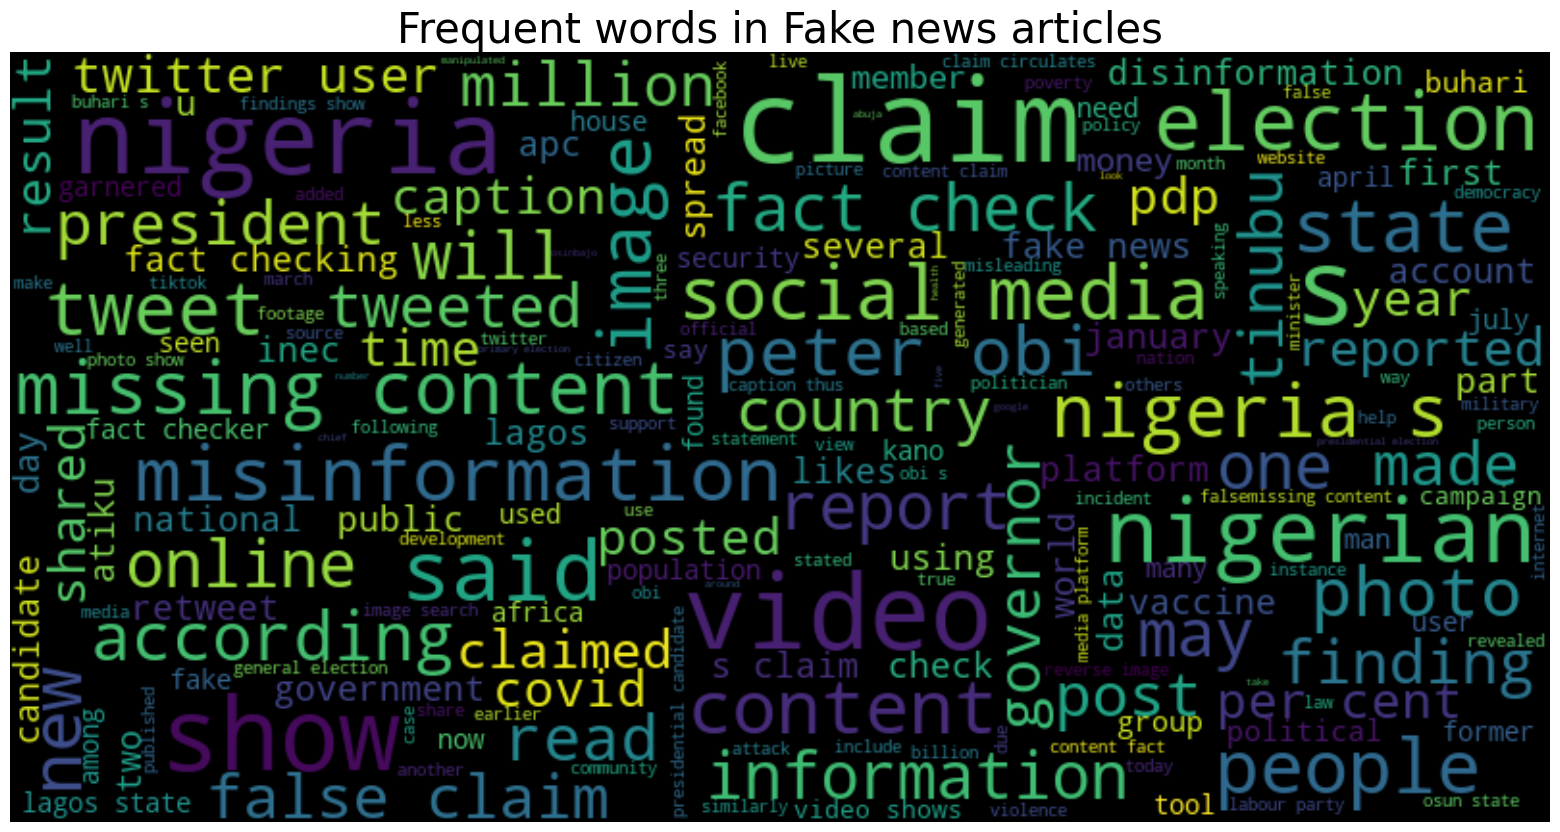

In [24]:
fake_text = " ".join(title_content for title_content in fake_news["title_content_lower"])
word_cloud = WordCloud(
    background_color = "black",
    max_words = 200,
    height = 400,
    width = 800, max_font_size = 60, stopwords = stopwords,
    random_state = 42).generate(fake_text)
plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Frequent words in Fake news articles", fontsize = 30)

## Wordcloud with Bigrams and Trigrams

In [25]:
sentences = (nltk.word_tokenize(text) for text in fake_news["title_content"])

phrases = Phrases(sentences)
bigrams = Phraser(phrases)
trigrams = Phrases(bigrams[sentences])

# fake_news["trigrams"] = fake_news["title_content"].apply(lambda x: " ".join(trigrams[bigrams[nltk.word_tokenize(x)]]))

# word_cloud = WordCloud(
#     background_color = "black", max_words = 200,
#     height = 400, width = 800, stopwords = stopwords,
#     max_font_size = 60, random_state = 42).generate(str(fake_news["trigrams"]))

# plt.figure(figsize = (20, 10))
# plt.imshow(word_cloud, interpolation = "bilinear")
# plt.axis("off")
# plt.title("Frequent Trigrams in Fake news articles", fontsize = 30)


C:\Users\Kashaf Jamil\AppData\Local\Temp\ipykernel_18128\1262743597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news["bigrams"] = fake_news["title_content"].apply(lambda x: " ".join(bigrams[nltk.word_tokenize(x)]))


Text(0.5, 1.0, 'Frequent Bigrams in Fake news articles')

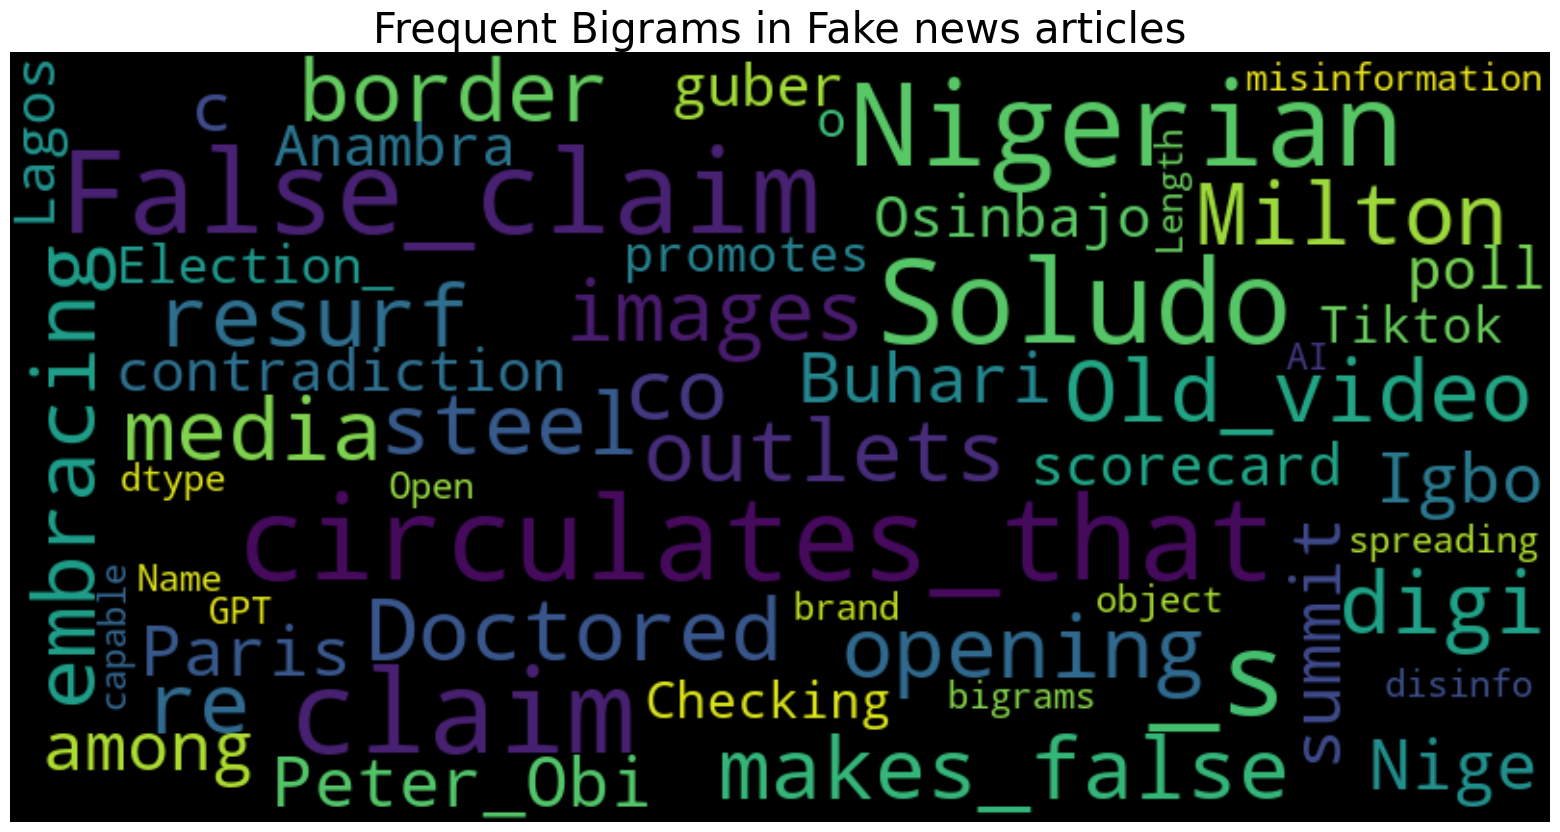

In [26]:
fake_news["bigrams"] = fake_news["title_content"].apply(lambda x: " ".join(bigrams[nltk.word_tokenize(x)]))
word_cloud = WordCloud(
    background_color = "black", max_words = 200,
    height = 400, width = 800, stopwords = stopwords,
    max_font_size = 60, random_state = 42).generate(str(fake_news["bigrams"]))

plt.figure(figsize = (20, 10))
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Frequent Bigrams in Fake news articles", fontsize = 30)


Since there are not any effective trigrams in this dataset. We can comment out the above block of code. WordCloud using Bigram will be enough in this case

## Sentiment Analysis

In [27]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\Kashaf
[nltk_data]     Jamil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Text(0, 0.5, 'Sentiment Score')

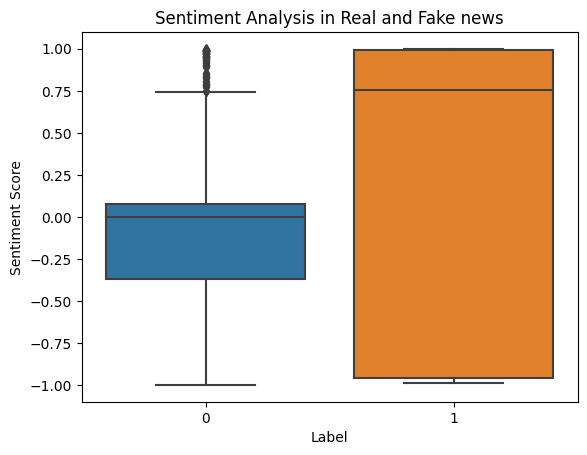

In [28]:
sentiment_analysis = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["title_content"].apply(lambda x: sentiment_analysis.polarity_scores(x)["compound"])
sns.boxplot(data = df, x = "label", y = "sentiment_score")
plt.title("Sentiment Analysis in Real and Fake news")
plt.xlabel("Label")
plt.ylabel("Sentiment Score")


We canc onclude that fake news contain neutral content. Not more positive and not more negative. While the real news contain mix type of content i.e. positive, negative, neutral

# Feature Engineering

In [29]:
#Count number of characters
def count_word(text):
    return len(text.split())

#count number of capital characters
def count_cap_char(text):
    count = 0
    for i in text:
        if i.isupper():
            count+=1
    return count

#count capital words
def count_cap_words(text):
    return sum(map(str.isupper, text.split()))

#number of sentences
def count_sen(text):
    return(len(nltk.sent_tokenize(text)))

#count number of unique words
def count_unique_words(text):
    return len(set(text.split()))

#count of stopwords
def count_stopwords(text):
    stopwords = set(STOPWORDS)
    tokenized_words = nltk.word_tokenize(text)
    stopwords_count = [words for words in tokenized_words if words in stopwords]
    return len(stopwords_count)

#count digits
def count_digit(text):
    digit_list = re.findall(r'[0-9]+', text)
    return len(digit_list)

#basic entity info
def list_of_ents(doc, label = 'GPE'):
    doc = nlp(doc)
    list_gpe = []
    if doc.ents:
        for ent in doc.ents:
            if ent.label_ == label:
                #print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
                list_gpe.append(ent.text)
    return list_gpe

def noun_count(x):
    noun_count = sum(1 for word, pos in nltk.pos_tag(word_tokenize(x)) if pos.startswith('NN'))
    return noun_count

def adj_count(x):
    adj_count = sum(1 for word, pos in nltk.pos_tag(word_tokenize(x)) if pos.startswith('JJ'))
    return adj_count

def verb_count(x):
    verb_count = sum(1 for word, pos in nltk.pos_tag(word_tokenize(x)) if pos.startswith('VB'))
    return verb_count

In [30]:
def feature_engg(df_, text):
    df = copy.deepcopy(df_)
    df["num_of_words"] = df[text].apply(count_word)
    df["num_of_cap_char"] = df[text].apply(count_cap_char)
    df["num_of_cap_word"] = df[text].apply(count_cap_words)
    df["num_of_sent"] = df[text].apply(count_sen)
    df["num_of_unique_words"] = df[text].apply(count_unique_words)
    df["num_of_stopwords"] = df[text].apply(count_stopwords)
    df["num_of_digit"] = df[text].apply(count_digit)
    df["location"] = df[text].apply(partial(list_of_ents, label="GPE"))
    df["count_location"] = df["location"].str.len()
    df["num_of_noun"] =df[text].apply(noun_count)
    df["num_of_adj"] = df[text].apply(adj_count)
    df["num_of_verb"] = df[text].apply(verb_count)
    return df

In [31]:
df_feature_ = fake_news.loc[:,("title_content", "label")]
df_feature = feature_engg(df_feature_, "title_content")

In [32]:
df_feature

,title_content,label,num_of_words,num_of_cap_char,num_of_cap_word,num_of_sent,num_of_unique_words,num_of_stopwords,num_of_digit,location,count_location,num_of_noun,num_of_adj,num_of_verb
1,Old video of Nigerian border re-opening resurf...,0,32,4,0,1,27,13,0,[],0,14,2,8
2,More Nigerian media outlets are embracing digi...,0,561,102,2,18,335,201,9,"[Nigeria, Nigeria, Nigeria, Dubawa, Africa Check]",5,208,61,91
3,Soludo makes false claim about Milton steel co...,0,14,5,0,1,14,3,0,[],0,7,3,2
4,Doctored images of Peter Obi at Paris summit c...,0,11,4,0,1,11,2,0,[Paris],1,9,0,0
5,False claim circulates that no Igbo among Nige...,0,12,5,0,1,12,2,0,"[Igbo, Nigeria]",2,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,"Buhari, Osinbajo in scorecard contradiction.",0,5,2,0,1,5,1,0,[Buhari],1,3,1,0
735,Lagos guber poll: False claim circulates that ...,0,14,5,0,1,14,2,0,[],0,10,1,1
736,Anambra Election: Checking Soludo’s claim on w...,0,13,4,0,1,13,1,0,[],0,8,3,3
738,How Tiktok promotes misinformation about brand...,0,370,68,2,15,219,127,7,"[Chick, boycotts, U.S., boycotts]",4,140,32,74


In [33]:
avg_num_of_wrds = df_feature["num_of_words"].mean()
avg_num_of_cap_char = df_feature["num_of_cap_char"].mean()
avg_num_of_cap_words = df_feature["num_of_cap_word"].mean()
avg_num_of_sent = df_feature["num_of_sent"].mean()
avg_num_of_unique_words = df_feature["num_of_unique_words"].mean()
avg_num_of_stopwords = df_feature["num_of_stopwords"].mean()
avg_num_of_digit = df_feature["num_of_digit"].mean()
avg_num_of_location = df_feature["count_location"].mean()
avg_num_of_noun = df_feature["num_of_noun"].mean()
avg_num_of_adj = df_feature["num_of_adj"].mean()
avg_num_of_verb = df_feature["num_of_verb"].mean()
avg_text_length_fake_news = df[df["label"] == 0]["title_content_length"].mean()
print("Average num of words"," ", avg_num_of_wrds)
print("Average num of characters in text"," ", avg_text_length_fake_news)
print("Average num of capital characters"," ", avg_num_of_cap_char)
print("Average num of capital words"," ", avg_num_of_cap_words)
print("Average num of sentence"," ", avg_num_of_sent)
print("Average num of Unique Words"," ", avg_num_of_unique_words)
print("Average num of stopwords"," ", avg_num_of_stopwords)
print("Average num of digits"," ", avg_num_of_digit)
print("Average num of location"," ", avg_num_of_location)
print("Average num of noun"," ", avg_num_of_noun)
print("Average num of adg"," ", avg_num_of_adj)
print("Average num of verb"," ", avg_num_of_verb) 


Average num of words   90.4843537414966
Average num of characters in text   476.3170068027211
Average num of capital characters   23.719727891156463
Average num of capital words   2.1442176870748297
Average num of sentence   4.16734693877551
Average num of Unique Words   53.02721088435374
Average num of stopwords   32.98095238095238
Average num of digits   3.3700680272108845
Average num of location   1.2625850340136053
Average num of noun   35.394557823129254
Average num of adg   6.9904761904761905
Average num of verb   15.193197278911565


In [34]:
locations = df_feature["location"].sum()
location = Counter(locations)
location

Counter({'Nigeria': 262,
         'Dubawa': 3,
         'Africa Check': 3,
         'Paris': 1,
         'Igbo': 7,
         'Africamissing': 2,
         'England': 1,
         'Lagos Island': 1,
         'Lagos State': 16,
         'London': 10,
         'France': 11,
         'Inter Miami CF': 1,
         'Miami': 2,
         'the United States': 9,
         'Barcelona': 2,
         'Saudi Arabia': 6,
         'United States': 1,
         'U.S.': 4,
         'US': 21,
         'Florida': 1,
         'Keyamo': 3,
         'China': 12,
         'Ikeja': 2,
         'Panti': 1,
         'Ghana': 5,
         'Lagos': 54,
         'Britain': 1,
         'Kumasi': 1,
         'Museveni': 1,
         'Uganda': 2,
         'Buhari': 56,
         'Sri Lanka': 1,
         'Mexico': 1,
         'Washington D.C': 1,
         'Naira': 5,
         'Abia': 4,
         'Adamawa': 2,
         'BUHARI': 1,
         'SAUDI ARABIA': 1,
         'Tinubu': 6,
         'Mecca': 3,
         'Abuja, Nigeria’